## Visualizing Embeddings Using TSNE

This notebook demostrates visualization of embeddings using TSNE.
We will use the embedings we trained in the "Training_embeddings_using_gensim.ipnb notebook. We are using the word2vec_cbow model. 

In [1]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

# !pip install gensim==3.6.0
# !pip install numpy==1.19.5
# !pip install matplotlib==3.2.2
# !pip install scikit-learn==0.21.3
# !pip install nltk==3.2.5

# ===========================

In [2]:
# To install the requirements for the entire chapter, uncomment the lines below and run this cell

# ===========================

# try :
#     import google.colab
#     !curl https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch3/ch3-requirements.txt | xargs -n 1 -L 1 pip install
# except ModuleNotFoundError :
#     !pip install -r "ch3-requirements.txt"

# ===========================

In [3]:
# FOR GOOGLE COLAB USERS
# upload the "word2vec_cbow.bin" file from the repository which is present in the Models folder of the same chapter.
# try:
#     from google.colab import files
#     uploaded = files.upload()
# except ModuleNotFoundError:
#     print("Not using colab")

In [4]:
from gensim.models import Word2Vec, KeyedVectors #To load the model
import warnings
warnings.filterwarnings('ignore') #ignore any generated warnings

import numpy as np
import matplotlib.pyplot as plt #to generate the t-SNE plot
from sklearn.manifold import TSNE #scikit learn's TSNE 

import os

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mccar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# load model
try:
    import google.colab
    model = KeyedVectors.load_word2vec_format('word2vec_cbow.bin',binary=True)
except ModuleNotFoundError:
    # cwd=os.getcwd() 
    # model = KeyedVectors.load_word2vec_format(cwd+'\Models\word2vec_cbow.bin', binary=True)
    model = KeyedVectors.load_word2vec_format("data\word2vec_cbow.bin", binary=True)

## TSNE
t-SNE stands for t-distributed Stochastic Neighbouring Entities. Its a technique used for visualizing high dimensional data by reducing it to a 2 or 3 dimensions.
 

In [9]:
#Preprocessing our models vocabulary to make better visualizations

words_vocab= list(model.index_to_key)#all the words in the vocabulary. 
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:50])

#Let us remove the stop words from this it will help making the visualization cleaner
stopwords_en = stopwords.words()
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]
print("Size of Vocabulary without stopwords:",len(words_vocab_without_sw))
print("Few words in Vocabulary without stopwords",words_vocab_without_sw[:30])
#The size didnt reduce much after removing the stop words so lets try visualizing only a selected subset of words

Size of Vocabulary: 40190
Few words in Vocabulary ['the', 'of', 'and', 'in', 'to', 'was', 'on', 'as', 'is', 'for', 'by', 'with', 'he', 'at', 'from', 'that', 'his', 'it', 'an', 'also', 'were', 'which', 'are', 'first', 'her', 'this', 'has', 'she', 'be', 'references', 'new', 'had', 'one', 'after', 'their', 'th', 'who', 'two', 'or', 'its', 'they', 'but', 'not', 'km', 'have', 'time', 'been', 'year', 'film', 'all']
Size of Vocabulary without stopwords: 39030
Few words in Vocabulary without stopwords ['references', 'km', 'time', 'year', 'film', 'season', 'university', 'national', 'team', 'external', 'links', 'september', 'state', 'world', 'december', 'born', 'city', 'american', 'october', 'march', 'party', 'november', 'school', 'league', 'united', 'st', 'january', 'south', 'years', 'april']


In [10]:
#With the increase in the amount of data, it becomes more and more difficult to visualize and interpret
#In practice, similar words are combined into groups for further visualization.

keys = ['school', 'year', 'college', 'city', 'states', 'university', 'team', 'film']
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)#apending access vector of all similar words
    word_clusters.append(words)#appending list of all smiliar words

In [12]:
print("Embedding clusters:",embedding_clusters[0][0]) #Access vector of the first word only
print("Word Clousters:",word_clusters[:2])

Embedding clusters: [-0.50897545 -0.7969905   0.12607068  1.4833081  -0.46052805 -0.64885694
  0.04935893 -1.1746247   0.8832168  -0.4163446   0.718957   -0.70856667
 -2.1078136  -1.2945046   0.8589337  -0.00386824 -1.1624206   0.41275084
 -1.3596025   1.7486758   0.64897996 -0.61645466  0.4760676   1.4459215
  0.20288818  3.8627574  -0.81020385  1.6439008  -1.3227203   1.0476216
 -0.7945862  -0.71495116 -0.06052849 -0.053003   -1.7914445  -2.0348537
  0.9067415   0.93065065 -2.0791345   2.344198   -1.472977    2.492591
 -0.11334165  1.0041739  -0.6207729   1.0780888   2.2371144   0.34189984
  1.6466856   1.4243091  -1.5105015  -0.05497374  0.3753655   0.85757744
  2.5288177  -1.3976281   0.06683142  0.01466737 -2.440846    0.7680863
 -1.5462049  -0.22853419 -1.3130072  -0.6440608  -1.6101454   0.72304684
 -0.5399992   1.2975364   1.8739386   0.27707806 -0.5938242   0.5289802
 -0.84126914 -1.5981083  -0.16866973  0.9369528  -1.2908813  -0.2182968
  0.40633085 -2.035785    1.3617402  -0

In [13]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it

### Hyperparameters of TSNE

1. n_components: The number of components, i.e., the dimension of the value space
2. perplexity: The number of effective neighbours
3. n_iter: Maximum number of iterations for the optimization.
4. init: Initialization of embedding.

t-SNE requires good amount of hyperparameter tuning to give effective results. More details on the hyperparameters can be found in the official [docs](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). It is very easy to misread tsne too. This [article](https://distill.pub/2016/misread-tsne/) provides more deatils about it.

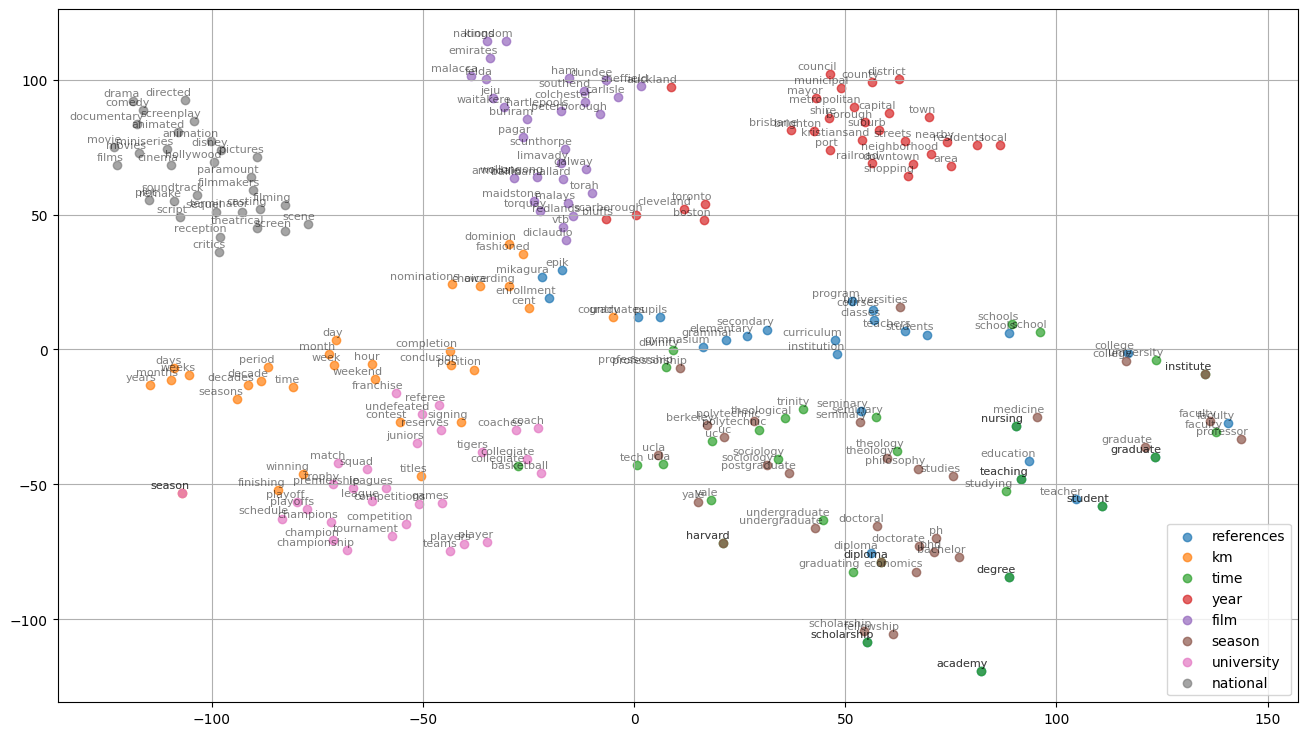

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline  

#script for constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7, number=""):
    plt.figure(figsize=(16, 9))
    

    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("pngs/similar_words{}.png".format(number), format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters, number="1")

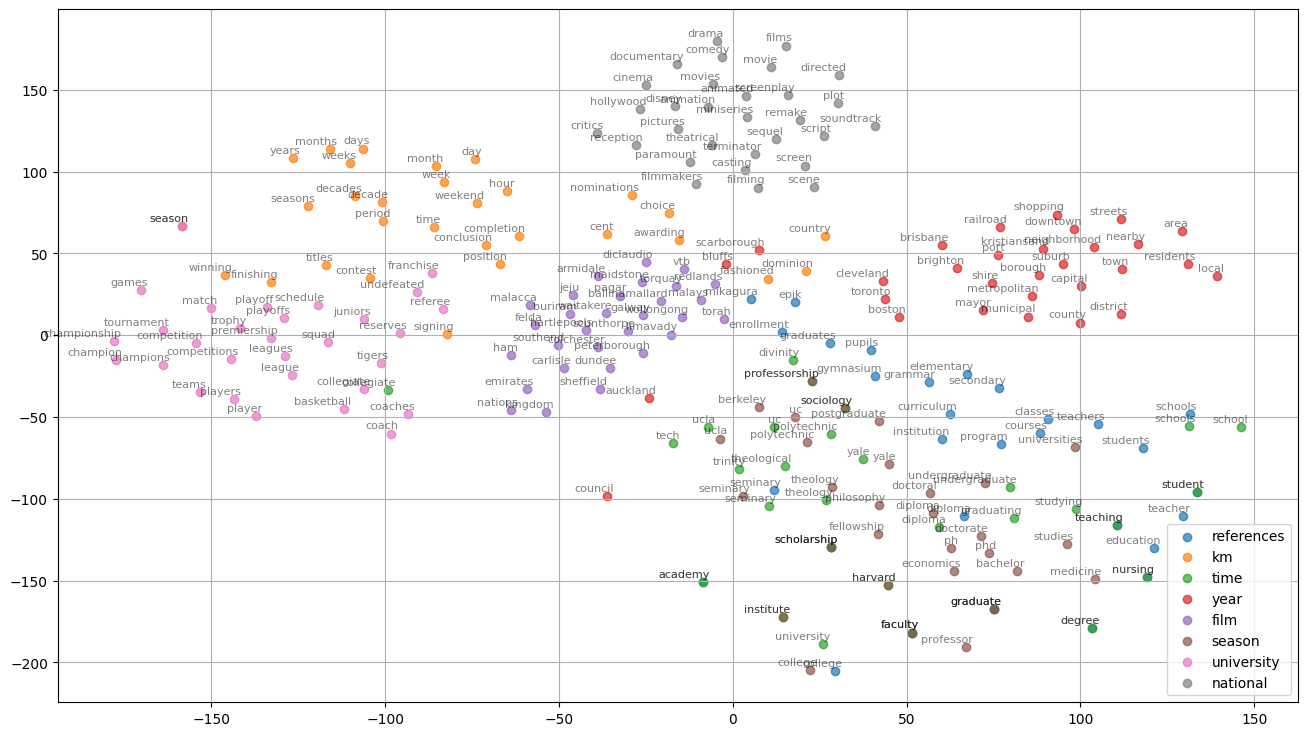

In [17]:
tsne_model_en_2d = TSNE(perplexity=25, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters, number="2")

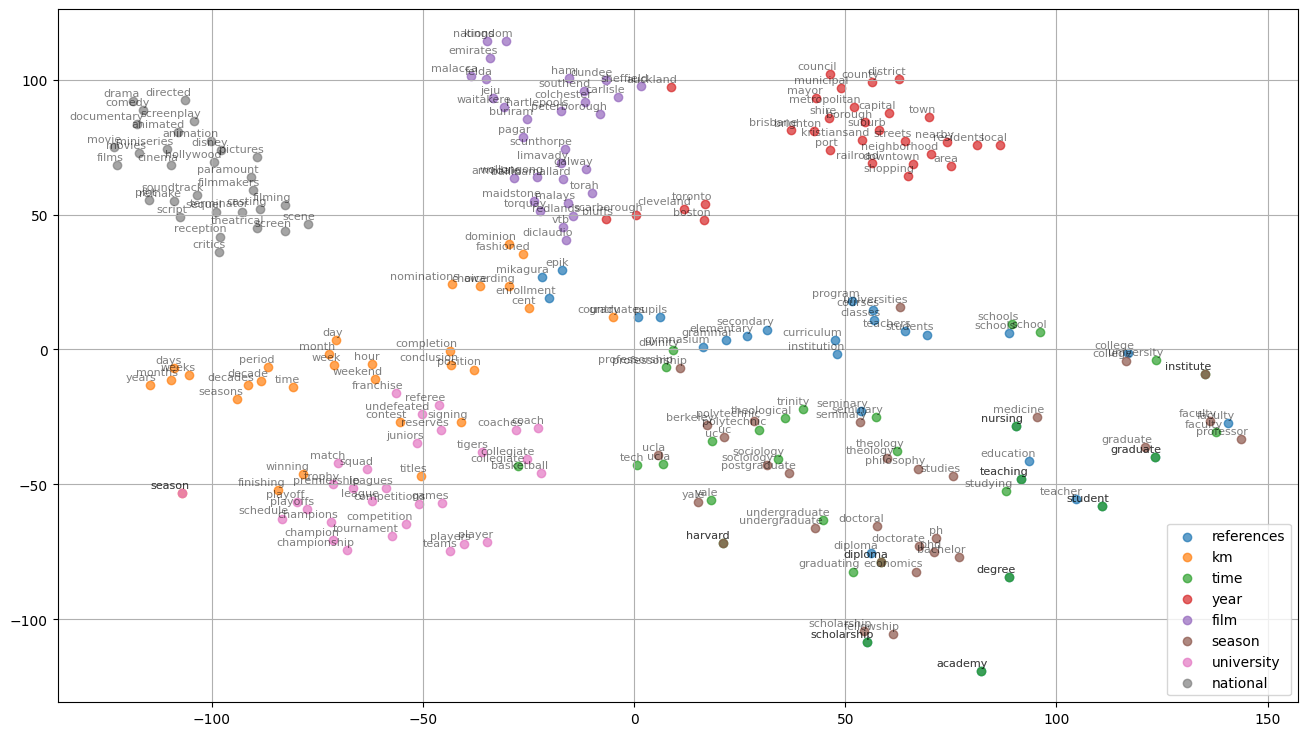

In [18]:
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters, number = "3")

Take a look at the above 3 graphs. We cannto say a higher or lower perplexity is good. It depends on the problem at hand. Here the plots of perplexity 5,10 are much better defined than the one with 25